## Task-D: Collinear features and their effect on linear models

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature
</pre>

**<font color='red'>Reference</font>**

https://online.stat.psu.edu/stat501/lesson/12/12.4

https://www.edupristine.com/blog/detecting-multicollinearity

<img src="https://i.imgur.com/LxqyuIx.png">

1. <font color='blue'>Finding the Correlation between the features</font>

    1. check the correlation between the features
    1. plot heat map of correlation matrix using seaborn heatmap

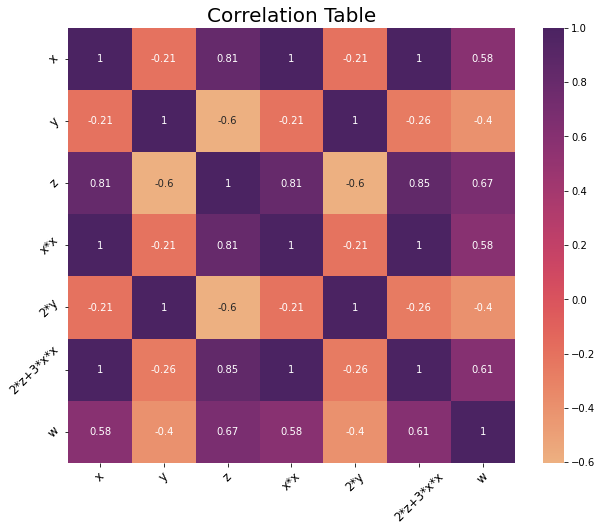

In [5]:
# b. plot heat map of correlation matrix using seaborn heatmap
correlation = data.drop(['target'], axis=1).corr()

fig = plt.figure(figsize =(10,8))
fig = sns.heatmap(correlation, annot = True, fmt = '.2g', cmap = 'flare')
plt.title('Correlation Table', fontsize = 20)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(rotation = 45, fontsize = 12)
plt.show()

2. <font color='blue'>Finding the best model for the given data</font>

    1. Train Logistic regression on data(X,Y) that we have created in the above cell
    1. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    1. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# https://www.kaggle.com/funxexcel/p2-logistic-regression-hyperparameter-tuning

lr_model = LogisticRegression(max_iter = 100000, tol = 0.0001, penalty='l2')
param_grid = {'C': np.logspace(-4, 4, 5)}
model = GridSearchCV(lr_model, param_grid, n_jobs = -1, cv = 5)

model.fit(X, Y)

print(f'Best Parameters : {model.best_params_}')
# print(model.best_estimator_)

lr_best_C = model.best_params_['C']

best_model = LogisticRegression(max_iter = 100000, tol = 0.0001, penalty='l2', C = lr_best_C)

Best Parameters : {'C': 0.0001}


3. <font color='blue'>Getting the weights with the original data</font>

    1. train the 'best_model' with X, Y
    1. Check the accuracy of the model 'best_model_accuracy'
    1. Get the weights W using best_model.coef_

In [7]:
best_model.fit(X, Y)

best_model_accuracy = best_model.score(X, Y)
print(f'Best model Avg. accuracy : {best_model_accuracy}')

best_weights = best_model.coef_
print(f"Best model wights W : {best_weights}")

Best model Avg. accuracy : 1.0
Best model wights W : [[ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
   0.00316971]]


4. <font color='blue'>Modifying original data</font>
    1. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    1. Train the same 'best_model' with data (X', Y)
    1. Check the accuracy of the model 'best_model_accuracy_edited'
    1. Get the weights W' using best_model.coef_

In [8]:
# a. Add a noise(order of 10^-2) to each element of X 
X_ = X + (10**-2)

# b. Train the same 'best_model' with data (X', Y)
best_model_noicy = LogisticRegression(max_iter = 100000, tol = 0.0001, penalty='l2', C = lr_best_C)
best_model_noicy.fit(X_, Y)

# c. Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model_noicy.score(X_, Y)
print(f'Best model Avg. accuracy : {best_model_accuracy_edited}')

# d. Get the weights W' using best_model.coef_
best_model_noicy_weights = best_model_noicy.coef_
print(f"Best model wights W' : {best_model_noicy_weights}")

Best model Avg. accuracy : 1.0
Best model wights W' : [[ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
   0.00316958]]


5. <font color='blue'>Checking deviations in metric and weights </font>
    1. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    1. find the absolute change between each value of W and W' ==> |(W-W')|
    1. print the top 4 features which have higher % change in weights 
    compare to the other feature

In [9]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference = best_model_accuracy_edited - best_model_accuracy
print(f"Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : {difference}")

# b. find the absolute change between each value of W and W' ==> |(W-W')|
abs_weight_difference = abs(best_weights - best_model_noicy_weights)
print(f'\nAbsolute weights differences : {abs_weight_difference}')

# c. print the top 4 features which have higher % change in weights compare to the other feature
abs_weight_diff_per  = abs_weight_difference*100
lr_top_4_feature = np.argsort(abs_weight_diff_per)[:,:4]

print(f'\nTop 4 Features indices are : {lr_top_4_feature[0]}')
print(f'\nCorresponding column names are : {[col for col in data.columns[lr_top_4_feature][0]]}')

Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : 0.0

Absolute weights differences : [[1.30431323e-07 1.45321783e-07 2.04625934e-07 1.53887588e-07
  1.45321783e-07 1.13731171e-07 1.22541126e-07]]

Top 4 Features indices are : [5 6 0 1]

Corresponding column names are : ['2*z+3*x*x', 'w', 'x', 'y']


#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

2. <font color='blue'>Finding the best model for the given data</font>

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

svc_model = LinearSVC(max_iter = 100000, tol = 0.0001, penalty='l2')
param_grid = {'C': np.logspace(-4, 4, 5)}
scv_model = GridSearchCV(svc_model, param_grid, n_jobs = -1, cv = 5)

scv_model.fit(X, Y)

print(f'Best Parameters : {scv_model.best_params_}')
# print(model.best_estimator_)

svc_best_C = scv_model.best_params_['C']

svc_best_model = LogisticRegression(max_iter = 10000, tol = 0.0001, penalty='l2', C = svc_best_C)

Best Parameters : {'C': 0.0001}


3. <font color='blue'>Getting the weights with the original data</font>

In [11]:
svc_best_model.fit(X, Y)

svc_best_model_accuracy = svc_best_model.score(X, Y)
print(f'Best model Avg. accuracy : {svc_best_model_accuracy}')

svc_best_weights = svc_best_model.coef_
print(f"Best model wights 'W' : {svc_best_weights}")

Best model Avg. accuracy : 1.0
Best model wights 'W' : [[ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
   0.00316971]]


4. <font color='blue'>Modifying original data</font>

In [12]:
# b. Train the same 'best_model' with data (X', Y)
svc_best_model_noicy = LogisticRegression(max_iter = 100000, tol = 0.0001, penalty='l2', C = svc_best_C)
svc_best_model_noicy.fit(X_, Y)

# c. Check the accuracy of the model 'best_model_accuracy_edited'
svc_best_model_accuracy_edited = svc_best_model_noicy.score(X_, Y)
print(f'Best model Avg. accuracy : {svc_best_model_accuracy_edited}')

# d. Get the weights W' using best_model.coef_
scv_best_model_noicy_weights = svc_best_model_noicy.coef_
print(f"Best model wights 'W' : {scv_best_model_noicy_weights}")

Best model Avg. accuracy : 1.0
Best model wights 'W' : [[ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
   0.00316958]]


5. <font color='blue'>Checking deviations in metric and weights </font>

In [13]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference_svc = svc_best_model_accuracy_edited - svc_best_model_accuracy
print(f"Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : {difference_svc}")

# b. find the absolute change between each value of W and W' ==> |(W-W')|
abs_svc_weight_difference = abs(svc_best_weights - scv_best_model_noicy_weights)
print(f'\nAbsolute weights differences : {abs_svc_weight_difference }')

# c. print the top 4 features which have higher % change in weights compare to the other feature
abs_svc_weight_diff_per  = abs_svc_weight_difference*100
svc_top_4_feature = np.argsort(abs_svc_weight_diff_per)[:,:4]

print(f'\nTop 4 Features indices are : {svc_top_4_feature[0]}')
print(f'\nCorresponding column names are : {[col for col in data.columns[svc_top_4_feature][0]]}')

Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : 0.0

Absolute weights differences : [[1.30431323e-07 1.45321783e-07 2.04625934e-07 1.53887588e-07
  1.45321783e-07 1.13731171e-07 1.22541126e-07]]

Top 4 Features indices are : [5 6 0 1]

Corresponding column names are : ['2*z+3*x*x', 'w', 'x', 'y']


In [14]:
p_table = PrettyTable()

p_table.field_names = ['', "Best 'C'",'Accuracy', 'Column Indices']
p_table.add_row(['Logistic regression', lr_best_C, best_model_accuracy, '-'])
p_table.add_row(['Logistic regression + Noice', lr_best_C, best_model_accuracy_edited, lr_top_4_feature[0]])
p_table.add_row(['Linear SVM', svc_best_C, svc_best_model_accuracy, '-'])
p_table.add_row(['Linear SVM + Noice', svc_best_C, svc_best_model_accuracy_edited, svc_top_4_feature[0]])

## <font color='red'>Observation</font>

In [15]:
print(p_table)

+-----------------------------+----------+----------+----------------+
|                             | Best 'C' | Accuracy | Column Indices |
+-----------------------------+----------+----------+----------------+
|     Logistic regression     |  0.0001  |   1.0    |       -        |
| Logistic regression + Noice |  0.0001  |   1.0    |   [5 6 0 1]    |
|          Linear SVM         |  0.0001  |   1.0    |       -        |
|      Linear SVM + Noice     |  0.0001  |   1.0    |   [5 6 0 1]    |
+-----------------------------+----------+----------+----------------+


* Multi colinearity is not affecting the accuracy of the model dataset for both linear and SVM model.
* The noice have no impact on accuracy values
```python
difference = best_model_accuracy_edited - best_model_accuracy
print(f"Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : {difference}")
>>> Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : 0.0
```
* By observing Top4 features with maximum abs percentage weights difference of original data and noisy data we can conclude that features having multi colinearity and high corelation is affected by outliers ( added noise) and coefficient are changing for those features.
```python
print(f'Top 4 Features indices are : {top_4_feature[0]}')
>>> Top 4 Features indices are : [5 6 0 1]
```
    - Both linear and SVM model returns the same column names
